In [5]:
!pip install fsspec

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re # regual expression 
import spacy
import string


import emoji


from textblob import TextBlob
from wordcloud import WordCloud
from nltk import *
from nltk.corpus import stopwords 
from nltk.corpus import stopwords 


from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
import pandas as pd
import re
import gensim
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
stopw = stopwords.words('italian') 
Word = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\info\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from feel_it import EmotionClassifier, SentimentClassifier
import pandas as pd
import nltk
import seaborn as sns

In [3]:

df = pd.read_csv('data/df_nltk.csv')
del df['Unnamed: 0']
df.shape

(17334, 27)

In [4]:
df

id        date      time              user_id  \
0      1237732721805398016  2020-03-11  14:30:51            130905290   
1      1238427084684435456  2020-03-13  12:30:00             16081414   
2      1240306917232295937  2020-03-18  16:59:47              9778122   
3      1240215608953880578  2020-03-18  10:56:57   785868835480014848   
4      1241727261251944448  2020-03-22  15:03:43           1288374560   
...                    ...         ...       ...                  ...   
17329  1498722245195227137  2022-03-01  19:10:02  1445652185442766861   
17330  1498720788299587584  2022-03-01  19:04:15           2755930961   
17331  1498718738413199362  2022-03-01  18:56:06            454365633   
17332  1498718198685970438  2022-03-01  18:53:58            454365633   
17333  1498717200278069265  2022-03-01  18:50:00           1409998686   

              username                      name place  \
0              airc_it                   airc_it   NaN   
1      wikimediaitalia          Wikimedia Italia   NaN   
2       paololattanzio            paololattanzio   NaN   
3         paroleostili            Parole O_Stili   NaN   
4        guggenheimpgc         Guggenheim Venice   NaN   
...                ...                       ...   ...   
17329  il_marchese_ant     Il Marchese Antonello   NaN   
17330         itsmxv__  queen.rachel⁷◟̽◞̽ ᴴ {jk}   NaN   
17331  scenarieconomic          Scenarieconomici   NaN   
17332  scenarieconomic          Scenarieconomici   NaN   
17333         inkd_dad              Andrew Gural   NaN   

                                                   tweet  \
0      📚 #Didatticaadistanza: sul sito di AIRC per le...   
1      #didatticaadistanza: con i progetti #Wikimedia...   
2      Ho depositato una interrogazione per attivare ...   
3      Ringraziamo di cuore @CiscoItalia che ci ha me...   
4      Crediamo nel potere dell'arte, e nella 'missio...   
...                                                  ...   
17329  @Antonio_Caramia @MilaSpicola @Miti_Vigliero @...   
17330  POV: sei Namjoon e sei finalmente riuscito a n...   
17331  @iofausto Forse non è stata la DAD ma i vaccin...   
17332  I danni della DAD  #UkrainaUnderAttack  https:...   
17333                         @NFLonCBS Bruce in Buffalo   

                                                mentions  replies_count  ...  \
0                                                     []              0  ...   
1      [{'screen_name': 'miursocial', 'name': 'miurso...              0  ...   
2                                                     []              0  ...   
3      [{'screen_name': 'ciscoitalia', 'name': 'cisco...              2  ...   
4                                                     []              2  ...   
...                                                  ...            ...  ...   
17329                                                 []              0  ...   
17330                                                 []              0  ...   
17331                                                 []              1  ...   
17332                                                 []             15  ...   
17333                                                 []              0  ...   

       n_frasi                                              token  \
0            2  ['didatticaadistanza', 'sul', 'sito', 'di', 'a...   
1            2  ['didatticaadistanza', 'con', 'i', 'progetti',...   
2            2  ['ho', 'depositato', 'una', 'interrogazione', ...   
3            3  ['ringraziamo', 'di', 'cuore', 'ciscoitalia', ...   
4            5  ['crediamo', 'nel', 'potere', "dell'arte", ','...   
...        ...                                                ...   
17329        2  ['antonio', 'caramia', 'milaspicola', 'miti', ...   
17330        1  ['pov', 'sei', 'namjoon', 'e', 'sei', 'finalme...   
17331        3  ['ofausto', 'forse', 'non', 'è', 'stata', 'la'...   
17332        1  ['i', 'danni', 'della', 'dad', 'ukrainaunderat...   
17333    

### Sentence splitting

In [5]:
sent_tokenizer  = nltk.data.load('tokenizers/punkt/italian.pickle')
df['sentences'] = df["cleaned_tweet"].astype(str).apply(sent_tokenizer.tokenize)

In [6]:
cat = [df.cleaned_tweet[0]]
cat

['  didatticaadistanza  sul sito di airc per le  scuola sono disponibili tanti contenuti e strumenti gratuiti per gli studenti e i docenti delle scuole di ogni ordine e grado.  scuolechiuse    ']

In [7]:
df.sentences[0]

['  didatticaadistanza  sul sito di airc per le  scuola sono disponibili tanti contenuti e strumenti gratuiti per gli studenti e i docenti delle scuole di ogni ordine e grado.',
 'scuolechiuse']

## Emotion classifier

In [9]:
def tweet_emotion(tweet):
    em = emotion_classifier.predict([tweet])
    for el in em:
        return el 

In [10]:
emotion_classifier = EmotionClassifier()

In [11]:
df['emotions'] = df['cleaned_tweet'].apply(tweet_emotion)

In [12]:
df["emotions"].value_counts()

anger      7281
joy        4526
sadness    4277
fear       1250
Name: emotions, dtype: int64

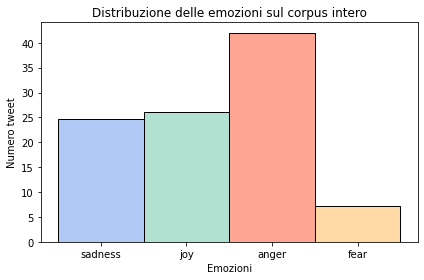

In [161]:
sns.set_palette("Set2")
colors = ['cornflowerblue',"#66c2a4",'#fc4e2a', '#feb24c']
sns.histplot(x="emotions", data=df, hue = "emotions", legend = False, stat = 'percent', palette = colors)
#plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.xlabel("Emozioni")
plt.ylabel("Numero tweet")
plt.title("Distribuzione delle emozioni sul corpus intero")
plt.tight_layout()
#plt.savefig('img/sentiment_analysis/lou0_barplt.png')
plt.show()

In [14]:
tok_anger = ' '.join(df[df['emotions']=='anger']['cleaned_tweet'].astype(str)).split()
tok_anger

['grazie',
 'a',
 'moodle',
 'e',
 'altro',
 'softwarelibero,',
 'a',
 'uniurbit',
 'migliaia',
 'di',
 'studenti',
 'hanno',
 'regolarmente',
 'seguito',
 'le',
 'lezioni',
 'in',
 'videoconferenza',
 '(via',
 'gba',
 'mm).',
 'bene',
 'la',
 'didatticaadistanza',
 'rispettosa',
 'della',
 'privacy',
 'e',
 'dei',
 'diritti',
 'degli',
 'studenti.',
 'il',
 'fallimento',
 'della',
 'didatticaadistanza',
 'spiegato',
 'bene',
 'aprile',
 'rassegnastampa',
 'didatticaadistanza',
 'oggi',
 'nella',
 'rubrica',
 'cantieregiovani',
 "l'articolo",
 'di',
 'marina',
 'piccone',
 'ignoranza',
 'e',
 'pregiudizio.',
 'continua',
 'qui',
 'come',
 'farà',
 'a',
 'ripartire',
 'la',
 'scuola?',
 'il',
 'ministero',
 'nomina',
 'esperti',
 'a',
 'cui',
 'chiede',
 'proposte',
 'su',
 'aule,',
 'modelli',
 'di',
 'insegnamento',
 'e',
 'didatticaadistanza.',
 'scuole',
 'chiuse',
 'fase',
 'maggio',
 'nelmondo',
 'togo',
 'radio',
 'cattoliche',
 'offrono',
 'didatticaadistanza',
 'agli',
 'studen

In [15]:
import nltk

In [16]:
freqdist = FreqDist(tok_anger).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

la     5497
in     5048
dad    5018
e      4919
di     4766
che    4392
non    4294
a      3875
per    2910
il     2521
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

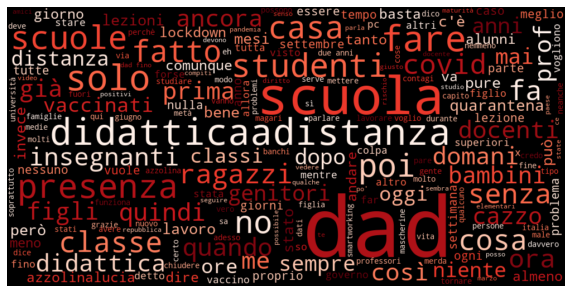

In [17]:
stopw2 = stopwords.words('italian') 
#stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df
words = ' '.join([word for word in df[df['emotions']=='anger']['cleaned_tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
#plt.savefig('img/sentiment_analysis/lou0_wc_pos.png')
plt.axis('off')

In [164]:
tok_joy= ' '.join(df[df['emotions']=='joy']['cleaned_tweet'].astype(str)).split()
tok_joy

['ringraziamo',
 'di',
 'cuore',
 'ciscoitalia',
 'che',
 'ci',
 'ha',
 'messo',
 'a',
 'disposizione',
 'la',
 'sua',
 'piattaforma',
 'per',
 'la',
 'realizzazione',
 'di',
 'webinar',
 'gratuiti',
 'per',
 'il',
 'mondo',
 'della',
 'scuola.',
 'insieme',
 'siamo',
 'tutti',
 'più',
 'forti!',
 'paroleostili',
 'didatticaadistanza',
 'vuoi',
 'riguardare',
 'i',
 'webinar?',
 'crediamo',
 'nel',
 'potere',
 "dell'arte,",
 'e',
 'nella',
 "'mission'",
 'del',
 'nostro',
 'museo',
 'di',
 'educare.',
 'crediamo',
 'anche,',
 'in',
 'un',
 'periodo',
 'particolarmente',
 'difficile,',
 'nella',
 'didattica',
 'a',
 'distanza.',
 'per',
 'questo',
 'ogni',
 'domenica',
 'portiamo',
 'nelle',
 'vostre',
 'case',
 'i',
 'nostri',
 'kidsday.',
 'buon',
 'divertimento!',
 'didatticaadistanza',
 'didatticaadistanza.',
 'oggi',
 'alle',
 'secondo',
 'appuntamento',
 'con',
 'i',
 'nostri',
 'kidsday',
 'virtuali.',
 'guardate,',
 'ascoltate,',
 'create!',
 'sintonizzatevi',
 'su',
 'fb,',
 'i

In [165]:
freqdist = FreqDist(tok_joy).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

dad    3094
in     1821
di     1795
la     1619
e      1604
che    1130
a      1100
per     977
il      918
è       788
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

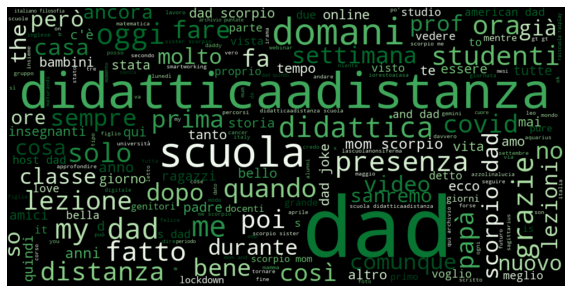

In [166]:
stopw2 = stopwords.words('italian') 
stopw2.extend(['t', 'https', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df
words = ' '.join([word for word in df[df['emotions']=='joy']['cleaned_tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
#plt.savefig('img/sentiment_analysis/lou0_wc_neg.png')
plt.axis('off')

In [21]:
print('account verificati: \n',df['emotions'].loc[df['verified'] == True].value_counts(),'\n') #normalize = True)
print('account non verificati: \n',df['emotions'].loc[df['verified'] == False].value_counts())

account verificati: 
 joy        39
sadness    36
anger      21
fear       14
Name: emotions, dtype: int64 

account non verificati: 
 anger      7260
joy        4487
sadness    4241
fear       1236
Name: emotions, dtype: int64


## Sentiment classifier

In [22]:
sentiment_classifier = SentimentClassifier()

In [23]:
def tweet_sentiment(tweet):
    sent = sentiment_classifier.predict([tweet])
    for el in sent:
        return el 

In [24]:
df['sentiments'] = df['cleaned_tweet'].apply(tweet_sentiment)

In [132]:
df.shape

(17334, 29)

In [25]:
df["sentiments"].value_counts()

negative    12328
positive     5006
Name: sentiments, dtype: int64

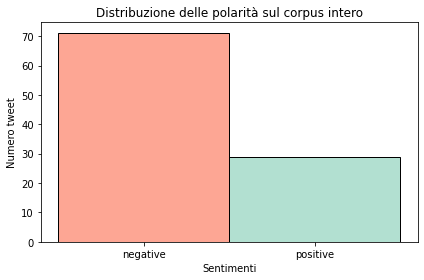

In [121]:
sns.set_palette("Set2")
colors = ['#fc4e2a','#66c2a4']
sns.histplot(x="sentiments", data=df, hue = "sentiments", legend = False, stat = 'percent', palette = colors)#
#plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.xlabel("Sentimenti")
plt.title("Distribuzione delle polarità sul corpus intero")
plt.tight_layout()
#plt.savefig('img/sentiment_analysis/lou0_barplt.png')
plt.show()

In [27]:
tok_pos = ' '.join(df[df['sentiments']=='positive']['cleaned_tweet'].astype(str)).split()
tok_pos

['ringraziamo',
 'di',
 'cuore',
 'ciscoitalia',
 'che',
 'ci',
 'ha',
 'messo',
 'a',
 'disposizione',
 'la',
 'sua',
 'piattaforma',
 'per',
 'la',
 'realizzazione',
 'di',
 'webinar',
 'gratuiti',
 'per',
 'il',
 'mondo',
 'della',
 'scuola.',
 'insieme',
 'siamo',
 'tutti',
 'più',
 'forti!',
 'paroleostili',
 'didatticaadistanza',
 'vuoi',
 'riguardare',
 'i',
 'webinar?',
 'crediamo',
 'nel',
 'potere',
 "dell'arte,",
 'e',
 'nella',
 "'mission'",
 'del',
 'nostro',
 'museo',
 'di',
 'educare.',
 'crediamo',
 'anche,',
 'in',
 'un',
 'periodo',
 'particolarmente',
 'difficile,',
 'nella',
 'didattica',
 'a',
 'distanza.',
 'per',
 'questo',
 'ogni',
 'domenica',
 'portiamo',
 'nelle',
 'vostre',
 'case',
 'i',
 'nostri',
 'kidsday.',
 'buon',
 'divertimento!',
 'didatticaadistanza',
 'didatticaadistanza.',
 'oggi',
 'alle',
 'secondo',
 'appuntamento',
 'con',
 'i',
 'nostri',
 'kidsday',
 'virtuali.',
 'guardate,',
 'ascoltate,',
 'create!',
 'sintonizzatevi',
 'su',
 'fb,',
 'i

In [28]:
import nltk

In [29]:
freqdist = FreqDist(tok_pos).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

dad                   3342
in                    2117
di                    2116
e                     1905
la                    1849
a                     1336
che                   1254
per                   1208
il                    1035
didatticaadistanza     882
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

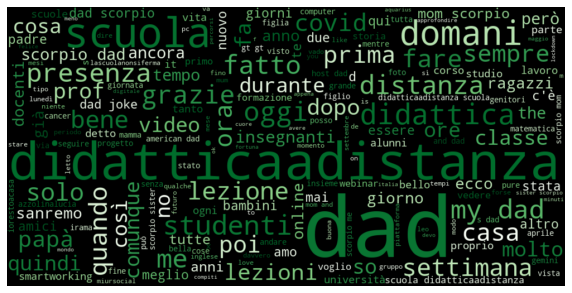

In [30]:
stopw2 = stopwords.words('italian') 
#stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df
words = ' '.join([word for word in df[df['sentiments']=='positive']['cleaned_tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
#plt.savefig('img/sentiment_analysis/lou0_wc_pos.png')
plt.axis('off')

In [168]:
tok_neg= ' '.join(df[df['sentiments']=='negative']['cleaned_tweet'].astype(str)).split()
tok_neg

['didatticaadistanza',
 'sul',
 'sito',
 'di',
 'airc',
 'per',
 'le',
 'scuola',
 'sono',
 'disponibili',
 'tanti',
 'contenuti',
 'e',
 'strumenti',
 'gratuiti',
 'per',
 'gli',
 'studenti',
 'e',
 'i',
 'docenti',
 'delle',
 'scuole',
 'di',
 'ogni',
 'ordine',
 'e',
 'grado.',
 'scuolechiuse',
 'didatticaadistanza',
 'con',
 'i',
 'progetti',
 'wikimedia',
 'e',
 'openstreetmap',
 'si',
 'può',
 'fare!',
 'i',
 'docenti',
 'che',
 'hanno',
 'seguito',
 'i',
 'nostri',
 'corsi',
 'riconosciuti',
 'da',
 'miursocial',
 'stanno',
 'portando',
 'avanti',
 'attività',
 'con',
 'le',
 'loro',
 'classi',
 'anche',
 'in',
 'questo',
 'periodo',
 'di',
 'chiusura',
 'delle',
 'scuole',
 'ho',
 'depositato',
 'una',
 'interrogazione',
 'per',
 'attivare',
 'delle',
 'misure',
 'di',
 'accompagnamento',
 'alla',
 'chiusura',
 'della',
 'scuola,',
 'perché',
 'bambine',
 'e',
 'bambini',
 'possano',
 'godere',
 'in',
 'futuro',
 'delle',
 'stesse',
 'opportunità.',
 'coronaviruschallenge',
 'd

In [169]:
freqdist = FreqDist(tok_neg).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

la     9130
in     8787
e      8536
dad    8487
di     8463
che    7154
non    7017
a      6641
per    5083
il     4313
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

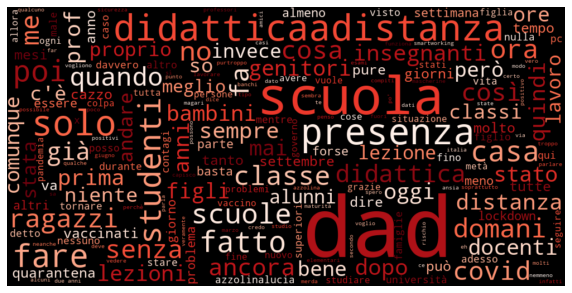

In [170]:
stopw2 = stopwords.words('italian') 
#stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df
words = ' '.join([word for word in df[df['sentiments']=='negative']['cleaned_tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
#plt.savefig('img/sentiment_analysis/lou0_wc_neg.png')
plt.axis('off')

# Analisi su fasi differenti

In [69]:
mask = (df['date'] > '2020-03-1') & (df['date'] <= '2020-05-01')
filtered_df_primo=df.loc[mask]

In [70]:
mask = (df['date'] > '2020-10-1') & (df['date'] <= '2021-01-01')
filtered_df_secondo=df.loc[mask]


In [71]:
mask = (df['date'] > '2021-03-1') & (df['date'] <= '2022-03-01')
filtered_df_terzo=df.loc[mask]

In [34]:
mask = (df['date'] > '2020-03-1') & (df['date'] <= '2021-03-01')
filtered_df_2020=df.loc[mask]
filtered_df_2020

id        date      time              user_id  \
0     1237732721805398016  2020-03-11  14:30:51            130905290   
1     1238427084684435456  2020-03-13  12:30:00             16081414   
2     1240306917232295937  2020-03-18  16:59:47              9778122   
3     1240215608953880578  2020-03-18  10:56:57   785868835480014848   
4     1241727261251944448  2020-03-22  15:03:43           1288374560   
...                   ...         ...       ...                  ...   
9410  1366520775168122883  2021-03-01  23:48:36   971444556502831105   
9411  1366519317853052929  2021-03-01  23:42:48            566409016   
9412  1366518779237306369  2021-03-01  23:40:40           1622872459   
9413  1366517701959684097  2021-03-01  23:36:23             11086342   
9414  1366516900075823109  2021-03-01  23:33:12  1228054395805454339   

             username                               name place  \
0             airc_it                            airc_it   NaN   
1     wikimediaitalia                   Wikimedia Italia   NaN   
2      paololattanzio                     paololattanzio   NaN   
3        paroleostili                     Parole O_Stili   NaN   
4       guggenheimpgc                  Guggenheim Venice   NaN   
...               ...                                ...   ...   
9410       salfasanop  Salvatore #OndaCivica #FBPEGlobal   NaN   
9411      elenamurder                   Lena✨(Superhero)   NaN   
9412       aletescari                 Alessandro Tescari   NaN   
9413         orporick                           orporick   NaN   
9414   cutepersoncina                               Gaia   NaN   

                                                  tweet  \
0     📚 #Didatticaadistanza: sul sito di AIRC per le...   
1     #didatticaadistanza: con i progetti #Wikimedia...   
2     Ho depositato una interrogazione per attivare ...   
3     Ringraziamo di cuore @CiscoItalia che ci ha me...   
4     Crediamo nel potere dell'arte, e nella 'missio...   
...                                                 ...   
9410  Le università sono in DaD da un anno intero. E...   
9411  Io pazza del mio corso di ISLLI!! Grazie alla ...   
9412                       PierPaolo dad in love #GFVIP   
9413  @Silvia240907 In realtà era il foglio con il c...   
9414  Devo studiare per la patente, per l'università...   

                                               mentions  replies_count  ...  \
0                                                    []              0  ...   
1     [{'screen_name': 'miursocial', 'name': 'miurso...              0  ...   
2                                                    []              0  ...   
3     [{'screen_name': 'ciscoitalia', 'name': 'cisco...              2  ...   
4                                                    []              2  ...   
...                                                 ...            ...  ...   
9410                                                 []              0  ...   
9411                                                 []              0  ...   
9412                                                 []              0  ...   
9413                                                 []              1  ...   
9414                                                 []              1  ...   

                                          token_wopunct  n_token  \
0     ['didatticaadistanza', 'sul', 'sito', 'di', 'a...       30   
1     ['didatticaadistanza', 'con', 'i', 'progetti',...       38   
2     ['ho', 'depositato', 'una', 'interrogazione', ...       31   
3     ['ringraziamo', 'di', 'cuore', 'ciscoitalia', ...       38   
4     ['crediamo', 'nel', 'potere', "dell'arte", ','...       45   
...                                                 ...      ...   
9410  ['le', 'università', 'sono', 'in', 'dad', 'da'...       39   
9411  ['io', 'pazza', 'del', 'mio', 'corso', 'di', '...       29   
9412        ['pierpaolo', 'dad', 'in', 'love', 'gfvip']        5   
9413  ['silvia', 'in', 'rea

In [35]:
mask = (df['date'] > '2021-03-1') & (df['date'] <= '2022-03-01')
filtered_df_2021=df.loc[mask]
filtered_df_2021

id        date      time              user_id  \
85     1372857882488672257  2021-03-19  11:30:00            469398862   
86     1375903313045155840  2021-03-27  21:11:27           2319707989   
87     1380211556231811073  2021-04-08  19:30:52            420351046   
88     1440252222751657985  2021-09-21  11:51:03             36043253   
2184   1370434524245585920  2021-03-12  19:00:26             82834637   
...                    ...         ...       ...                  ...   
17329  1498722245195227137  2022-03-01  19:10:02  1445652185442766861   
17330  1498720788299587584  2022-03-01  19:04:15           2755930961   
17331  1498718738413199362  2022-03-01  18:56:06            454365633   
17332  1498718198685970438  2022-03-01  18:53:58            454365633   
17333  1498717200278069265  2022-03-01  18:50:00           1409998686   

              username                      name place  \
85         direpuntoit                   Dire.it   NaN   
86      tgrraitrentino          Tgr Rai Trentino   NaN   
87           sole24ore               IlSole24ORE   NaN   
88          greenme_it                   GreenMe   NaN   
2184        skizzoriky                  Riccardo   NaN   
...                ...                       ...   ...   
17329  il_marchese_ant     Il Marchese Antonello   NaN   
17330         itsmxv__  queen.rachel⁷◟̽◞̽ ᴴ {jk}   NaN   
17331  scenarieconomic          Scenarieconomici   NaN   
17332  scenarieconomic          Scenarieconomici   NaN   
17333         inkd_dad              Andrew Gural   NaN   

                                                   tweet  \
85     Secondo @EnricoLetta sarebbe un errore tornare...   
86     A #Trento nel pomeriggio la grande adunata del...   
87     #Scuola, 4 #app da non perdere per rendere div...   
88     Se i bimbi non vanno a scuola, la scuola arriv...   
2184   #Ddi #dad #Scuola #DidatticaAdistanza Forza ra...   
...                                                  ...   
17329  @Antonio_Caramia @MilaSpicola @Miti_Vigliero @...   
17330  POV: sei Namjoon e sei finalmente riuscito a n...   
17331  @iofausto Forse non è stata la DAD ma i vaccin...   
17332  I danni della DAD  #UkrainaUnderAttack  https:...   
17333                         @NFLonCBS Bruce in Buffalo   

                                                mentions  replies_count  ...  \
85     [{'screen_name': 'enricoletta', 'name': 'enric...              3  ...   
86                                                    []              1  ...   
87                                                    []              1  ...   
88                                                    []              0  ...   
2184                                                  []              0  ...   
...                                                  ...            ...  ...   
17329                                                 []              0  ...   
17330                                                 []              0  ...   
17331                                                 []              1  ...   
17332                                                 []             15  ...   
17333                                                 []              0  ...   

                                           token_wopunct  n_token  \
85     ['secondo', 'enricoletta', 'sarebbe', 'un', 'e...       26   
86     ['a', 'trento', 'nel', 'pomeriggio', 'la', 'gr...       26   
87     ['scuola', ',', 'app', 'da', 'non', 'perdere',...       19   
88     ['se', 'i', 'bimbi', 'non', 'vanno', 'a', 'scu...       31   
2184   ['ddi', 'dad', 'scuola', 'didatticaadistanza',...       31   
...                                                  ...      ...   
17329  ['antonio', 'caramia', 'milaspicola', 'miti', ...       27   
17330  ['pov', 'sei', 'namjoon', 'e', 'sei', 'finalme...       21   
17331  ['ofausto', 'forse', 'non', 'è', 'stata', 'la'...       24   
17332  ['i', 'danni', 'della', 'dad', 'ukrainaunderat...        5   
17333    

## Emotion classifier  - anni

In [36]:
filtered_df_2020["emotions"].value_counts()

anger      3662
joy        2425
sadness    2328
fear        653
Name: emotions, dtype: int64

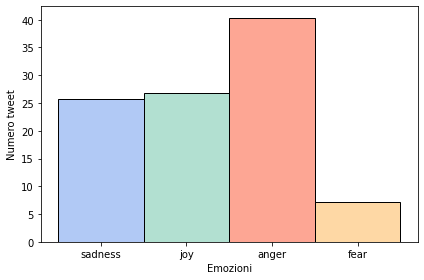

In [37]:
sns.set_palette("Set2")
colors = ['cornflowerblue',"#66c2a4",'#fc4e2a', '#feb24c']
sns.histplot(x="emotions", data=filtered_df_2020, hue = "emotions", legend = False, stat = 'percent', palette = colors)#
#plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
plt.xlabel('Emozioni')
#plt.savefig('img/sentiment_analysis/lou0_barplt.png')
plt.show()

In [38]:
filtered_df_2021["emotions"].value_counts()

anger      3513
joy        1973
sadness    1875
fear        580
Name: emotions, dtype: int64

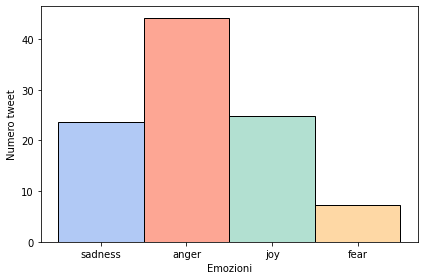

In [39]:
sns.set_palette("Set2")
colors = ['cornflowerblue','#fc4e2a',"#66c2a4", '#feb24c']
sns.histplot(x="emotions", data=filtered_df_2021, hue = "emotions", legend = False, stat = 'percent', palette = colors)#
#plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.xlabel('Emozioni')
plt.tight_layout()
#plt.savefig('img/sentiment_analysis/lou0_barplt.png')
plt.show()

In [40]:
print('account verificati: \n',filtered_df_2020['emotions'].loc[filtered_df_2020['verified'] == True].value_counts(),'\n') #normalize = True)
print('account non verificati: \n',filtered_df_2020['emotions'].loc[filtered_df_2020['verified'] == False].value_counts())

account verificati: 
 joy        38
sadness    33
anger      18
fear       14
Name: emotions, dtype: int64 

account non verificati: 
 anger      3644
joy        2387
sadness    2295
fear        639
Name: emotions, dtype: int64


In [41]:
print('account verificati: \n',filtered_df_2021['emotions'].loc[filtered_df_2021['verified'] == True].value_counts(),'\n') #normalize = True)
print('account non verificati: \n',filtered_df_2021['emotions'].loc[filtered_df_2021['verified'] == False].value_counts())

account verificati: 
 anger      2
sadness    1
joy        1
Name: emotions, dtype: int64 

account non verificati: 
 anger      3511
joy        1972
sadness    1874
fear        580
Name: emotions, dtype: int64


In [42]:
tok_anger = ' '.join(filtered_df_2021[filtered_df_2021['emotions']=='anger']['cleaned_tweet'].astype(str)).split()
tok_anger

['a',
 'trento',
 'nel',
 'pomeriggio',
 'la',
 'grande',
 'adunata',
 'delle',
 'famiglie',
 'che',
 'non',
 'vogliono',
 'la',
 'didatticaadistanza.',
 'in',
 'centinaia',
 'per',
 'chiedere',
 'il',
 'ritorno',
 'della',
 'scuola',
 'in',
 'presenza.',
 'se',
 'i',
 'bimbi',
 'non',
 'vanno',
 'a',
 'scuola,',
 'la',
 'scuola',
 'arriva',
 'in',
 'strada.',
 'l’insegnante',
 'che',
 'ha',
 'trasformato',
 'i',
 'muri',
 'in',
 'lavagne',
 'per',
 'contrastare',
 'la',
 'dispersione',
 'scolastica',
 'specialebambini',
 'didatticaadistanza',
 'sto',
 'diventando',
 'ceca',
 '(e',
 'non',
 'per',
 'i',
 'videogiochi)',
 'videogames',
 'didatticaadistanza',
 'favola',
 'domenicale',
 'al',
 'nipote',
 'in',
 'dad',
 "c'era",
 'una',
 'volta',
 'una',
 'ministra',
 'che',
 'diceva',
 'che',
 'nelle',
 'scuole',
 'il',
 'rischio',
 'contagi',
 'da',
 'covid',
 'era',
 'irrilevante.',
 'infatti',
 'poi',
 'lei',
 'è',
 'andata',
 'a',
 'casa',
 'e',
 'le',
 'scuole',
 'sono',
 'state',
 '

In [43]:
import nltk

In [44]:
freqdist = FreqDist(tok_anger).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

in     2762
dad    2580
la     2417
di     2284
e      2277
non    2011
che    1996
a      1710
per    1427
il     1184
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

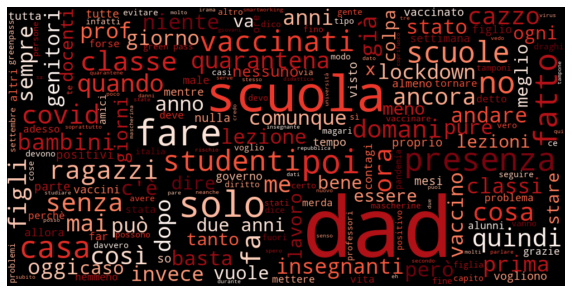

In [45]:
stopw2 = stopwords.words('italian') 
#stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = filtered_df_2021
words = ' '.join([word for word in filtered_df_2021[filtered_df_2021['emotions']=='anger']['cleaned_tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
#plt.savefig('img/sentiment_analysis/lou0_wc_pos.png')
plt.axis('off')

In [171]:
tok_joy= ' '.join(filtered_df_2021[filtered_df_2021['emotions']=='joy']['cleaned_tweet'].astype(str)).split()
tok_joy

['scuola,',
 'app',
 'da',
 'non',
 'perdere',
 'per',
 'rendere',
 'divertente',
 'la',
 'didatticaadistanza.',
 'su',
 ',',
 "l'informazione",
 'premium',
 'del',
 'sole',
 'ore',
 'dad',
 'ddi',
 'dad',
 'scuola',
 'didatticaadistanza',
 'forza',
 'ragazzi',
 '(di',
 'tutte',
 'le',
 'scuole',
 'di',
 'ogni',
 'ordine',
 'e',
 'grado)!',
 'non',
 'mollate!',
 'se',
 'vincete',
 'questa',
 'sfida',
 'domani',
 'sarà',
 'un',
 'giorno',
 'migliore.',
 'grazie',
 'a',
 'michele',
 'trabucco',
 'che',
 'mi',
 'ha',
 'intervistato',
 'per',
 'parlare',
 'del',
 'mio',
 'canale',
 'didattico',
 'scuolavirus',
 'e',
 'ha',
 'pubblicato',
 'il',
 'podcast',
 "dell'intervista",
 'qui.',
 'scuolavirus',
 'didatticaadistanza',
 'lezionionline',
 'scuola',
 'dad',
 'un',
 'mese',
 'di',
 'successo',
 'di',
 'stellati',
 'per',
 'la',
 'dad',
 'con',
 'casolaro',
 'hotellerie',
 'e',
 'gli',
 'chef,',
 'sale',
 'in',
 'cattedra',
 'la',
 'stellamichelin',
 'vincenzo',
 'guarino.',
 'food',
 'did

In [172]:
freqdist = FreqDist(tok_joy).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

dad    1530
in     1035
di      654
e       629
la      602
che     548
a       433
il      365
per     352
è       348
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

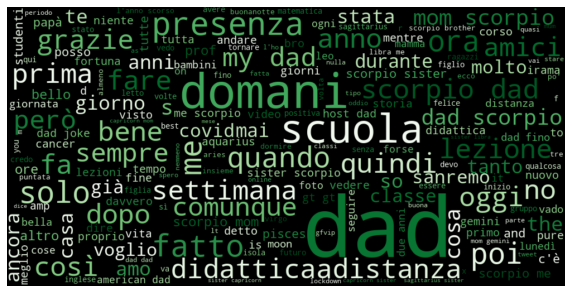

In [173]:
stopw2 = stopwords.words('italian') 
stopw2.extend(['t', 'https', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = filtered_df_2021
words = ' '.join([word for word in filtered_df_2021[filtered_df_2021['emotions']=='joy']['cleaned_tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
#plt.savefig('img/sentiment_analysis/lou0_wc_neg.png')
plt.axis('off')

## Emotion classifier  - mesi

In [72]:
filtered_df_primo["emotions"].value_counts()

joy        687
anger      571
sadness    450
fear       109
Name: emotions, dtype: int64

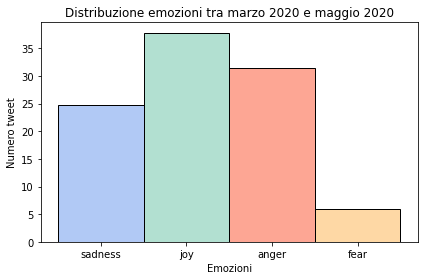

In [83]:
sns.set_palette("Set2")
colors = ['cornflowerblue',"#66c2a4",'#fc4e2a', '#feb24c']
sns.histplot(x="emotions", data=filtered_df_primo, hue = "emotions", legend = False, stat = 'percent', palette = colors)#
#plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.title('Distribuzione emozioni tra marzo 2020 e maggio 2020')
plt.tight_layout()
plt.xlabel('Emozioni')
#plt.savefig('img/sentiment_analysis/lou0_barplt.png')
plt.show()

In [74]:
filtered_df_secondo["emotions"].value_counts()

anger      1180
sadness     684
joy         467
fear        198
Name: emotions, dtype: int64

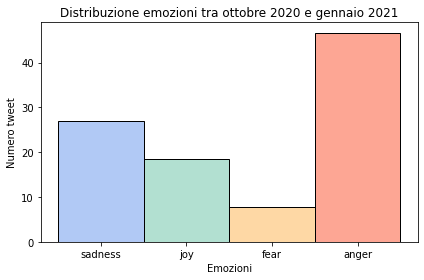

In [82]:
sns.set_palette("Set2")
colors = ['cornflowerblue',"#66c2a4",'#feb24c', '#fc4e2a']
sns.histplot(x="emotions", data=filtered_df_secondo, hue = "emotions", legend = False, stat = 'percent', palette = colors)#
#plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.title('Distribuzione emozioni tra ottobre 2020 e gennaio 2021')
plt.xlabel('Emozioni')
plt.tight_layout()
#plt.savefig('img/sentiment_analysis/lou0_barplt.png')
plt.show()

In [76]:
filtered_df_terzo["emotions"].value_counts()

anger      3513
joy        1973
sadness    1875
fear        580
Name: emotions, dtype: int64

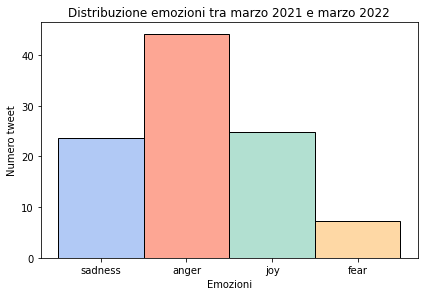

In [85]:
sns.set_palette("Set2")
colors = ['cornflowerblue','#fc4e2a',"#66c2a4", '#feb24c']
sns.histplot(x="emotions", data=filtered_df_terzo, hue = "emotions", legend = False, stat = 'percent', palette = colors)#
#plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
plt.title('Distribuzione emozioni tra marzo 2021 e marzo 2022')
plt.xlabel('Emozioni')
#plt.savefig('img/sentiment_analysis/lou0_barplt.png')
plt.show()

In [78]:
print('account verificati: \n',filtered_df_primo['emotions'].loc[filtered_df_primo['verified'] == True].value_counts(),'\n') #normalize = True)
print('account non verificati: \n',filtered_df_primo['emotions'].loc[filtered_df_primo['verified'] == False].value_counts())

account verificati: 
 joy        20
sadness    11
anger       4
fear        3
Name: emotions, dtype: int64 

account non verificati: 
 joy        667
anger      567
sadness    439
fear       106
Name: emotions, dtype: int64


In [79]:
print('account verificati: \n',filtered_df_secondo['emotions'].loc[filtered_df_secondo['verified'] == True].value_counts(),'\n') #normalize = True)
print('account non verificati: \n',filtered_df_secondo['emotions'].loc[filtered_df_secondo['verified'] == False].value_counts())

account verificati: 
 sadness    12
fear        7
anger       6
joy         4
Name: emotions, dtype: int64 

account non verificati: 
 anger      1174
sadness     672
joy         463
fear        191
Name: emotions, dtype: int64


In [80]:
print('account verificati: \n',filtered_df_terzo['emotions'].loc[filtered_df_terzo['verified'] == True].value_counts(),'\n') #normalize = True)
print('account non verificati: \n',filtered_df_terzo['emotions'].loc[filtered_df_terzo['verified'] == False].value_counts())

account verificati: 
 anger      2
sadness    1
joy        1
Name: emotions, dtype: int64 

account non verificati: 
 anger      3511
joy        1972
sadness    1874
fear        580
Name: emotions, dtype: int64


### Word cloud

In [87]:
import nltk

#### Prima fase

In [86]:
tok_anger = ' '.join(filtered_df_primo[filtered_df_primo['emotions']=='anger']['cleaned_tweet'].astype(str)).split()
tok_anger

['grazie',
 'a',
 'moodle',
 'e',
 'altro',
 'softwarelibero,',
 'a',
 'uniurbit',
 'migliaia',
 'di',
 'studenti',
 'hanno',
 'regolarmente',
 'seguito',
 'le',
 'lezioni',
 'in',
 'videoconferenza',
 '(via',
 'gba',
 'mm).',
 'bene',
 'la',
 'didatticaadistanza',
 'rispettosa',
 'della',
 'privacy',
 'e',
 'dei',
 'diritti',
 'degli',
 'studenti.',
 'il',
 'fallimento',
 'della',
 'didatticaadistanza',
 'spiegato',
 'bene',
 'aprile',
 'rassegnastampa',
 'didatticaadistanza',
 'oggi',
 'nella',
 'rubrica',
 'cantieregiovani',
 "l'articolo",
 'di',
 'marina',
 'piccone',
 'ignoranza',
 'e',
 'pregiudizio.',
 'continua',
 'qui',
 'come',
 'farà',
 'a',
 'ripartire',
 'la',
 'scuola?',
 'il',
 'ministero',
 'nomina',
 'esperti',
 'a',
 'cui',
 'chiede',
 'proposte',
 'su',
 'aule,',
 'modelli',
 'di',
 'insegnamento',
 'e',
 'didatticaadistanza.',
 'scuole',
 'chiuse',
 'fase',
 'qualcuno',
 'potrebbe',
 'gentilmente',
 'spiegare',
 'a',
 'tutti',
 'quelli',
 'che',
 '“dobbiamo',
 'rest

In [88]:
freqdist = FreqDist(tok_anger).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

la     443
di     373
e      362
che    340
non    323
a      300
dad    291
per    270
in     208
il     198
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

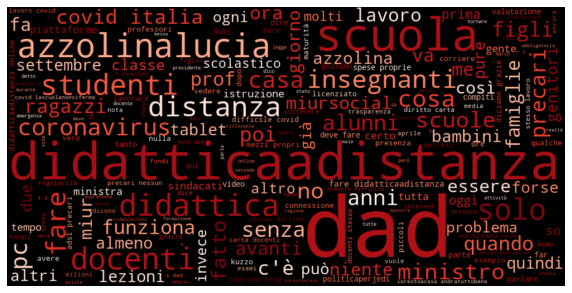

In [89]:
stopw2 = stopwords.words('italian') 
#stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = filtered_df_primo
words = ' '.join([word for word in filtered_df_primo[filtered_df_primo['emotions']=='anger']['cleaned_tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
#plt.savefig('img/sentiment_analysis/lou0_wc_pos.png')
plt.axis('off')

In [174]:
tok_joy= ' '.join(filtered_df_primo[filtered_df_primo['emotions']=='joy']['cleaned_tweet'].astype(str)).split()
tok_joy

['ringraziamo',
 'di',
 'cuore',
 'ciscoitalia',
 'che',
 'ci',
 'ha',
 'messo',
 'a',
 'disposizione',
 'la',
 'sua',
 'piattaforma',
 'per',
 'la',
 'realizzazione',
 'di',
 'webinar',
 'gratuiti',
 'per',
 'il',
 'mondo',
 'della',
 'scuola.',
 'insieme',
 'siamo',
 'tutti',
 'più',
 'forti!',
 'paroleostili',
 'didatticaadistanza',
 'vuoi',
 'riguardare',
 'i',
 'webinar?',
 'crediamo',
 'nel',
 'potere',
 "dell'arte,",
 'e',
 'nella',
 "'mission'",
 'del',
 'nostro',
 'museo',
 'di',
 'educare.',
 'crediamo',
 'anche,',
 'in',
 'un',
 'periodo',
 'particolarmente',
 'difficile,',
 'nella',
 'didattica',
 'a',
 'distanza.',
 'per',
 'questo',
 'ogni',
 'domenica',
 'portiamo',
 'nelle',
 'vostre',
 'case',
 'i',
 'nostri',
 'kidsday.',
 'buon',
 'divertimento!',
 'didatticaadistanza',
 'didatticaadistanza.',
 'oggi',
 'alle',
 'secondo',
 'appuntamento',
 'con',
 'i',
 'nostri',
 'kidsday',
 'virtuali.',
 'guardate,',
 'ascoltate,',
 'create!',
 'sintonizzatevi',
 'su',
 'fb,',
 'i

In [175]:
freqdist = FreqDist(tok_joy).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

dad                   342
di                    284
e                     258
la                    257
didatticaadistanza    228
per                   202
a                     185
il                    164
i                     128
in                    127
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

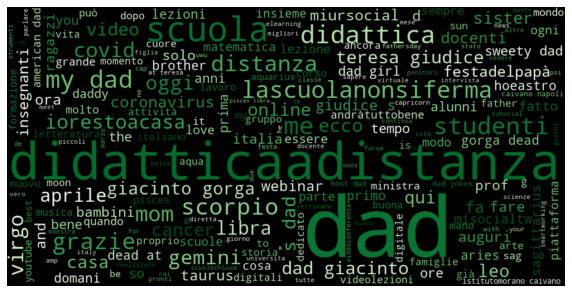

In [176]:
stopw2 = stopwords.words('italian') 
stopw2.extend(['t', 'https', 'like', 'papà', 'Sweety_dad_girl','co','know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = filtered_df_primo
words = ' '.join([word for word in filtered_df_primo[filtered_df_primo['emotions']=='joy']['cleaned_tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
#plt.savefig('img/sentiment_analysis/lou0_wc_neg.png')
plt.axis('off')

#### Seconda fase

In [99]:
tok_anger = ' '.join(filtered_df_secondo[filtered_df_secondo['emotions']=='anger']['cleaned_tweet'].astype(str)).split()
tok_anger

['dpcm,',
 'ulteriori',
 'misure',
 'restrittive.',
 'bar',
 'e',
 'ristoranti',
 'chiusi',
 'alle',
 'anche',
 'la',
 'domenica.',
 'stop',
 'a',
 'teatri,',
 'cinema,',
 'palestre',
 'e',
 'piscine.',
 'didatticaadistanza',
 'per',
 'le',
 'superiori.',
 'in',
 'buongiornoitalia',
 'alle',
 'su',
 'raitre',
 'e',
 'online',
 'qui',
 'ioseguotgr',
 'dpcm,',
 'il',
 'sottosegretario',
 'puglisipd',
 '"verso',
 'il',
 'coprifuoco',
 'nazionale',
 'alle',
 ',',
 'didatticaadistanza',
 'al',
 'alle',
 'superiori',
 'e',
 'forse',
 'anche',
 'in',
 'terza',
 'media.',
 'altre',
 'notizie',
 'qui',
 'tgrrailazio',
 'minlavoro',
 'ministerosalute',
 'ioseguotgr',
 'covid',
 'regionelombardia',
 'mette',
 'a',
 'disposizione',
 'delle',
 'università',
 'pubbliche',
 'lombarde',
 ',',
 'mln',
 'di',
 'euro',
 'per',
 'l’acquisto',
 'di',
 'strumentazioni',
 'digitali',
 'per',
 'la',
 'didatticaadistanza',
 'e',
 'per',
 'gli',
 'investimenti',
 'degli',
 'atenei',
 'in',
 'infrastrutture',
 '

In [100]:
import nltk

In [101]:
freqdist = FreqDist(tok_anger).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

la     983
dad    794
e      781
di     749
che    736
in     735
a      688
non    685
per    450
è      437
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

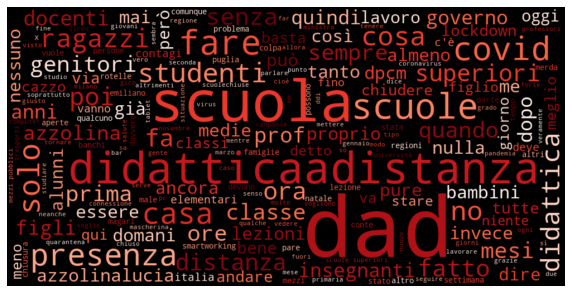

In [102]:
stopw2 = stopwords.words('italian') 
#stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = filtered_df_secondo
words = ' '.join([word for word in filtered_df_secondo[filtered_df_secondo['emotions']=='anger']['cleaned_tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
#plt.savefig('img/sentiment_analysis/lou0_wc_pos.png')
plt.axis('off')

In [103]:
tok_joy= ' '.join(filtered_df_secondo[filtered_df_secondo['emotions']=='joy']['cleaned_tweet'].astype(str)).split()
tok_joy

['potete',
 'mandarmi',
 'i',
 'vostri',
 'video',
 'qui',
 'dad',
 'didatticaadistanza',
 'privacy,',
 'diritto',
 'all’oblio,',
 'didatticaadistanza.',
 'il',
 'manuale',
 'all’uso',
 'consapevole',
 'della',
 'rete.',
 'intervista',
 'a',
 'lorella',
 'zanardo',
 'e',
 'cesare',
 'cantù',
 'corpodelledonne',
 'buone',
 'notizie',
 'per',
 'gli',
 'studenti',
 'che',
 'seguono',
 'la',
 'scuola',
 'da',
 'remoto!',
 'scuola',
 'didatticaadistanza',
 'novembre',
 'radio',
 'non',
 'è',
 'obbligatorio',
 'avere',
 'un',
 'portatile',
 'per',
 'la',
 'scuola,',
 'guardate',
 'il',
 'nuovo',
 'dell',
 'inspiron',
 'serie',
 'all',
 'in',
 'one',
 'minimal,',
 'elegante,',
 'e',
 'con',
 'la',
 'migliore',
 'tecnologia',
 'racchiusa',
 'in',
 '"',
 'schermo',
 'grande',
 'e',
 'webcam',
 'popup',
 'per',
 'seguire',
 'la',
 'didatticaadistanza',
 'dalla',
 'didattica',
 'a',
 'distanza',
 'al',
 'cambio',
 'culturale',
 'per',
 'un’esperienza',
 'formativa',
 'completa.',
 'come',
 'si',


In [104]:
freqdist = FreqDist(tok_joy).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

dad    341
la     272
di     236
in     192
e      171
che    166
a      133
per    127
il     104
è       89
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

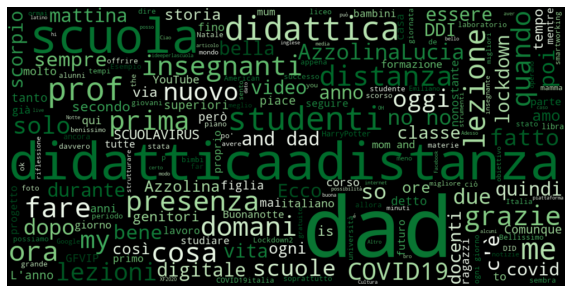

In [105]:
stopw2 = stopwords.words('italian') 
stopw2.extend(['t', 'https', 'like', 'papà', 'Sweety_dad_girl','co','know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = filtered_df_secondo
words = ' '.join([word for word in filtered_df_secondo[filtered_df_secondo['emotions']=='joy']['cleaned_tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
#plt.savefig('img/sentiment_analysis/lou0_wc_neg.png')
plt.axis('off')

## Sentiment classifier - anni

In [49]:
filtered_df_2020["sentiments"].value_counts()

negative    6349
positive    2719
Name: sentiments, dtype: int64

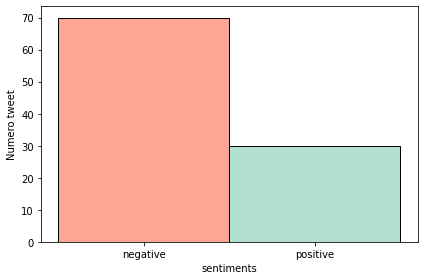

In [50]:
sns.set_palette("Set2")
colors = ['#fc4e2a','#66c2a4']
sns.histplot(x="sentiments", data=filtered_df_2020, hue = "sentiments", legend = False, stat = 'percent',palette = colors)#
#plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
#plt.savefig('img/sentiment_analysis/lou0_barplt.png')
plt.show()

In [51]:
filtered_df_2021["sentiments"].value_counts()

negative    5800
positive    2141
Name: sentiments, dtype: int64

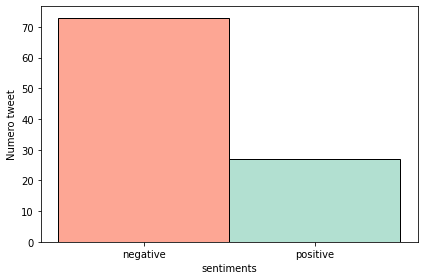

In [52]:
sns.set_palette("Set2")
colors = ['#fc4e2a','#66c2a4']
sns.histplot(x="sentiments", data=filtered_df_2021, hue = "sentiments", legend = False, stat = 'percent',palette = colors)#
#plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
#plt.savefig('img/sentiment_analysis/lou0_barplt.png')
plt.show()

In [53]:
tok_pos = ' '.join(filtered_df_2021[filtered_df_2021['sentiments']=='positive']['cleaned_tweet'].astype(str)).split()
tok_pos

['scuola,',
 'app',
 'da',
 'non',
 'perdere',
 'per',
 'rendere',
 'divertente',
 'la',
 'didatticaadistanza.',
 'su',
 ',',
 "l'informazione",
 'premium',
 'del',
 'sole',
 'ore',
 'dad',
 'ddi',
 'dad',
 'scuola',
 'didatticaadistanza',
 'forza',
 'ragazzi',
 '(di',
 'tutte',
 'le',
 'scuole',
 'di',
 'ogni',
 'ordine',
 'e',
 'grado)!',
 'non',
 'mollate!',
 'se',
 'vincete',
 'questa',
 'sfida',
 'domani',
 'sarà',
 'un',
 'giorno',
 'migliore.',
 '«molte',
 'università',
 'tradizionali',
 'hanno',
 'creato',
 'il',
 'modello',
 'misto',
 'il',
 'modello',
 'a',
 'cui',
 'ho',
 'sempre',
 'aspirato,',
 'con',
 'incontri',
 'faccia',
 'a',
 'faccia',
 'con',
 'i',
 'docenti',
 'e',
 'lavoro',
 'a',
 'distanza.»',
 'il',
 'rettore',
 'uninettuno',
 'prof.',
 'mariamatagarito',
 'a',
 'rainewsroom',
 '.',
 'elearning',
 'didatticaadistanza',
 'blendedlearning',
 'grazie',
 'a',
 'michele',
 'trabucco',
 'che',
 'mi',
 'ha',
 'intervistato',
 'per',
 'parlare',
 'del',
 'mio',
 'canal

In [54]:
import nltk

In [55]:
freqdist = FreqDist(tok_pos).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

dad    1661
in     1184
di      784
e       729
la      687
che     608
a       524
per     421
il      410
è       379
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

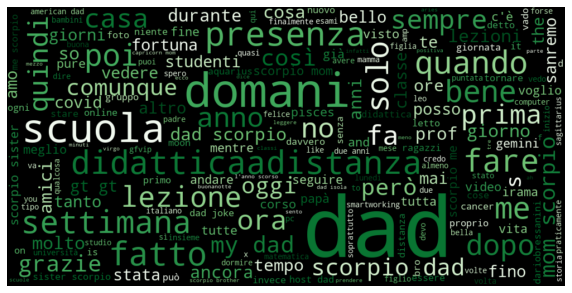

In [56]:
stopw2 = stopwords.words('italian') 
#stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = filtered_df_2021
words = ' '.join([word for word in filtered_df_2021[filtered_df_2021['sentiments']=='positive']['cleaned_tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
#plt.savefig('img/sentiment_analysis/lou0_wc_pos.png')
plt.axis('off')

In [57]:
tok_neg= ' '.join(filtered_df_2021[filtered_df_2021['sentiments']=='negative']['cleaned_tweet'].astype(str)).split()
tok_neg

['secondo',
 'enricoletta',
 'sarebbe',
 'un',
 'errore',
 'tornare',
 'alla',
 'scuola',
 'del',
 ',',
 'meglio',
 'fare',
 'un',
 'mix,',
 'perché',
 '"la',
 'didatticaadistanza',
 'ci',
 'permette',
 'di',
 'superare',
 'le',
 'disuguaglianze".',
 'a',
 'trento',
 'nel',
 'pomeriggio',
 'la',
 'grande',
 'adunata',
 'delle',
 'famiglie',
 'che',
 'non',
 'vogliono',
 'la',
 'didatticaadistanza.',
 'in',
 'centinaia',
 'per',
 'chiedere',
 'il',
 'ritorno',
 'della',
 'scuola',
 'in',
 'presenza.',
 'se',
 'i',
 'bimbi',
 'non',
 'vanno',
 'a',
 'scuola,',
 'la',
 'scuola',
 'arriva',
 'in',
 'strada.',
 'l’insegnante',
 'che',
 'ha',
 'trasformato',
 'i',
 'muri',
 'in',
 'lavagne',
 'per',
 'contrastare',
 'la',
 'dispersione',
 'scolastica',
 'specialebambini',
 'didatticaadistanza',
 'e',
 'dopo',
 'un',
 'anno…',
 'covid',
 'covid',
 'pandemia',
 'didatticaadistanza',
 'dad',
 'smartworking',
 'lavoroagile',
 'dpcm',
 'zonarossa',
 'zonagialla',
 'zonaarancione',
 'dantealighier

In [58]:
freqdist = FreqDist(tok_neg).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

in     4835
dad    4342
la     3871
e      3861
di     3832
non    3254
che    3182
a      2875
per    2346
il     1981
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

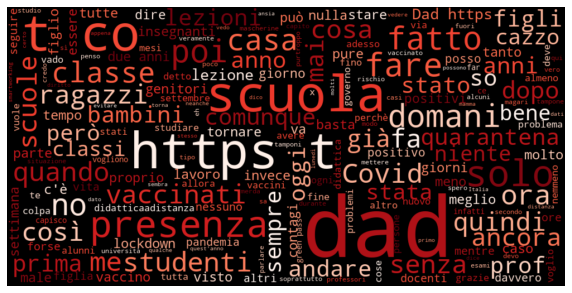

In [59]:
stopw2 = stopwords.words('italian') 
#stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = filtered_df_2021
words = ' '.join([word for word in filtered_df_2021[filtered_df_2021['sentiments']=='negative']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
#plt.savefig('img/sentiment_analysis/lou0_wc_neg.png')
plt.axis('off')

## Sentiment classifier - mesi

In [129]:
filtered_df_primo.shape

(1817, 29)

In [106]:
filtered_df_primo["sentiments"].value_counts()

negative    1016
positive     801
Name: sentiments, dtype: int64

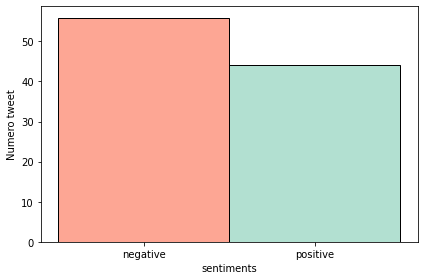

In [107]:
sns.set_palette("Set2")
colors = ['#fc4e2a','#66c2a4']
sns.histplot(x="sentiments", data=filtered_df_primo, hue = "sentiments", legend = False, stat = 'percent',palette = colors)#
#plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
#plt.savefig('img/sentiment_analysis/lou0_barplt.png')
plt.show()

In [130]:
filtered_df_secondo.shape

(2529, 29)

In [109]:
filtered_df_secondo["sentiments"].value_counts()

negative    1989
positive     540
Name: sentiments, dtype: int64

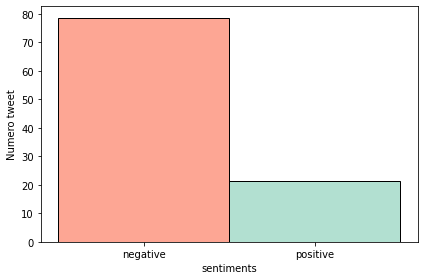

In [110]:
sns.set_palette("Set2")
colors = ['#fc4e2a','#66c2a4']
sns.histplot(x="sentiments", data=filtered_df_secondo, hue = "sentiments", legend = False, stat = 'percent',palette = colors)#
#plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
#plt.savefig('img/sentiment_analysis/lou0_barplt.png')
plt.show()

In [131]:
filtered_df_terzo.shape

(7941, 29)

In [111]:
filtered_df_terzo["sentiments"].value_counts()

negative    5800
positive    2141
Name: sentiments, dtype: int64

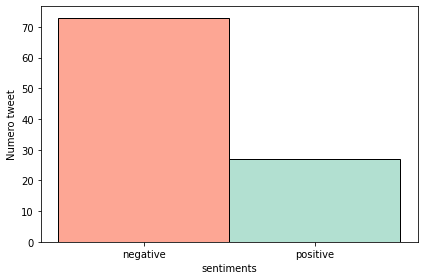

In [112]:
sns.set_palette("Set2")
colors = ['#fc4e2a','#66c2a4']
sns.histplot(x="sentiments", data=filtered_df_terzo, hue = "sentiments", legend = False, stat = 'percent',palette = colors)#
#plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
#plt.savefig('img/sentiment_analysis/lou0_barplt.png')
plt.show()

In [134]:
tok_pos = ' '.join(filtered_df_primo[filtered_df_primo['sentiments']=='positive']['cleaned_tweet'].astype(str)).split()
tok_pos

['ringraziamo',
 'di',
 'cuore',
 'ciscoitalia',
 'che',
 'ci',
 'ha',
 'messo',
 'a',
 'disposizione',
 'la',
 'sua',
 'piattaforma',
 'per',
 'la',
 'realizzazione',
 'di',
 'webinar',
 'gratuiti',
 'per',
 'il',
 'mondo',
 'della',
 'scuola.',
 'insieme',
 'siamo',
 'tutti',
 'più',
 'forti!',
 'paroleostili',
 'didatticaadistanza',
 'vuoi',
 'riguardare',
 'i',
 'webinar?',
 'crediamo',
 'nel',
 'potere',
 "dell'arte,",
 'e',
 'nella',
 "'mission'",
 'del',
 'nostro',
 'museo',
 'di',
 'educare.',
 'crediamo',
 'anche,',
 'in',
 'un',
 'periodo',
 'particolarmente',
 'difficile,',
 'nella',
 'didattica',
 'a',
 'distanza.',
 'per',
 'questo',
 'ogni',
 'domenica',
 'portiamo',
 'nelle',
 'vostre',
 'case',
 'i',
 'nostri',
 'kidsday.',
 'buon',
 'divertimento!',
 'didatticaadistanza',
 'didatticaadistanza.',
 'oggi',
 'alle',
 'secondo',
 'appuntamento',
 'con',
 'i',
 'nostri',
 'kidsday',
 'virtuali.',
 'guardate,',
 'ascoltate,',
 'create!',
 'sintonizzatevi',
 'su',
 'fb,',
 'i

In [135]:
import nltk

In [136]:
freqdist = FreqDist(tok_pos).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

dad                   364
di                    359
e                     355
didatticaadistanza    317
la                    310
per                   265
a                     243
il                    194
i                     157
con                   157
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

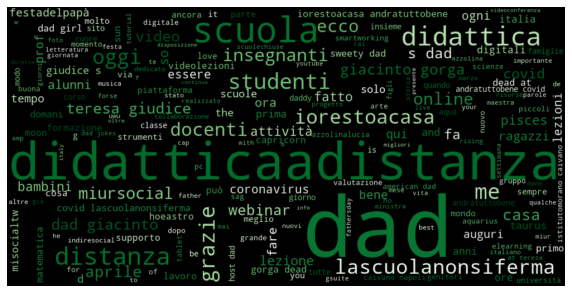

In [141]:
stopw2 = stopwords.words('italian') 
stopw2.extend(['mom', 'papà', 'sister', 'leo', 'scorpio', 'virgo', 'my', 'gemini','sagittarius', 'brother','libra', 'aries', 'cancer'])

tweet_df = filtered_df_primo
words = ' '.join([word for word in filtered_df_primo[filtered_df_primo['sentiments']=='positive']['cleaned_tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
#plt.savefig('img/sentiment_analysis/lou0_wc_pos.png')
plt.axis('off')

In [148]:
tok_neg= ' '.join(filtered_df_terzo[filtered_df_terzo['sentiments']=='negative']['cleaned_tweet'].astype(str)).split()
tok_neg

['secondo',
 'enricoletta',
 'sarebbe',
 'un',
 'errore',
 'tornare',
 'alla',
 'scuola',
 'del',
 ',',
 'meglio',
 'fare',
 'un',
 'mix,',
 'perché',
 '"la',
 'didatticaadistanza',
 'ci',
 'permette',
 'di',
 'superare',
 'le',
 'disuguaglianze".',
 'a',
 'trento',
 'nel',
 'pomeriggio',
 'la',
 'grande',
 'adunata',
 'delle',
 'famiglie',
 'che',
 'non',
 'vogliono',
 'la',
 'didatticaadistanza.',
 'in',
 'centinaia',
 'per',
 'chiedere',
 'il',
 'ritorno',
 'della',
 'scuola',
 'in',
 'presenza.',
 'se',
 'i',
 'bimbi',
 'non',
 'vanno',
 'a',
 'scuola,',
 'la',
 'scuola',
 'arriva',
 'in',
 'strada.',
 'l’insegnante',
 'che',
 'ha',
 'trasformato',
 'i',
 'muri',
 'in',
 'lavagne',
 'per',
 'contrastare',
 'la',
 'dispersione',
 'scolastica',
 'specialebambini',
 'didatticaadistanza',
 'e',
 'dopo',
 'un',
 'anno…',
 'covid',
 'covid',
 'pandemia',
 'didatticaadistanza',
 'dad',
 'smartworking',
 'lavoroagile',
 'dpcm',
 'zonarossa',
 'zonagialla',
 'zonaarancione',
 'dantealighier

In [149]:
freqdist = FreqDist(tok_neg).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

in     4835
dad    4342
la     3871
e      3861
di     3832
non    3254
che    3182
a      2875
per    2346
il     1981
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

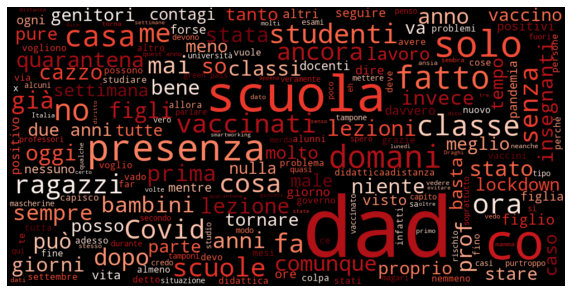

In [160]:
stopw2 = stopwords.words('italian') 
stopw2.extend(['https', 'quindi', 'essere', 'fare', 'fare', 'andare', "c'è", 'poi', 'così', 'però','quando', 't'])

tweet_df = filtered_df_terzo
words = ' '.join([word for word in filtered_df_terzo[filtered_df_terzo['sentiments']=='negative']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
#plt.savefig('img/sentiment_analysis/lou0_wc_neg.png')
plt.axis('off')

# Analisi picchi

Picchi 2020:
- 1 marzo 2020
- 1 aprile 2020
- 1 novembre 2020

Picchi 2021:
- 1 ottobre 2021
- 1 novembre 2021

Down:
- Agosto 2020 
- Gennaio 2021 
- Agosto 2021

In [60]:
mask = ((df['date'] > '2020-03-01') & (df['date'] <= '2020-04-01')) | ((df['date'] > '2020-11-01') & (df['date'] <= '2020-11-30')) | ((df['date'] > '2021-11-01') & (df['date'] <= '2021-11-30')) |  ((df['date'] > '2021-10-01') & (df['date'] <= '2021-10-31'))  
 
filtered_df_picchi=df.loc[mask]
filtered_df_picchi

id        date      time              user_id  \
0      1237732721805398016  2020-03-11  14:30:51            130905290   
1      1238427084684435456  2020-03-13  12:30:00             16081414   
2      1240306917232295937  2020-03-18  16:59:47              9778122   
3      1240215608953880578  2020-03-18  10:56:57   785868835480014848   
4      1241727261251944448  2020-03-22  15:03:43           1288374560   
...                    ...         ...       ...                  ...   
15497  1465447042491297794  2021-11-29  23:26:16           1270909994   
15498  1465446533617307657  2021-11-29  23:24:14   823975885963399168   
15499  1465443609055006721  2021-11-29  23:12:37            279204537   
15500  1465443402514894855  2021-11-29  23:11:48  1304176837149499392   
15501  1465442263643873284  2021-11-29  23:07:16  1349326471479885826   

              username                name place  \
0              airc_it             airc_it   NaN   
1      wikimediaitalia    Wikimedia Italia   NaN   
2       paololattanzio      paololattanzio   NaN   
3         paroleostili      Parole O_Stili   NaN   
4        guggenheimpgc   Guggenheim Venice   NaN   
...                ...                 ...   ...   
15497          tiziueb  tiziana pasqualini   NaN   
15498        giovydean            Giovanni   NaN   
15499           czamba     Czamba (he/him)   NaN   
15500    bethesunsh1ne       ||•biondaa•||   NaN   
15501        rej_panta       Panta Rei 😎✝️   NaN   

                                                   tweet  \
0      📚 #Didatticaadistanza: sul sito di AIRC per le...   
1      #didatticaadistanza: con i progetti #Wikimedia...   
2      Ho depositato una interrogazione per attivare ...   
3      Ringraziamo di cuore @CiscoItalia che ci ha me...   
4      Crediamo nel potere dell'arte, e nella 'missio...   
...                                                  ...   
15497  @di_reddito @DiegoFusaro Intanto le classi van...   
15498  E criticavamo l'#Azzolina? In DUE ANNI non sia...   
15499  @vitalbaa La DAD credo sia stata devastante.  ...   
15500  sono a casa con il covid e sto malissimo, se d...   
15501  Non riuscivamo ad attuare il protocollo ed ecc...   

                                                mentions  replies_count  ...  \
0                                                     []              0  ...   
1      [{'screen_name': 'miursocial', 'name': 'miurso...              0  ...   
2                                                     []              0  ...   
3      [{'screen_name': 'ciscoitalia', 'name': 'cisco...              2  ...   
4                                                     []              2  ...   
...                                                  ...            ...  ...   
15497                                                 []              1  ...   
15498                                                 []              0  ...   
15499                                                 []              1  ...   
15500                                                 []              0  ...   
15501                                                 []              0  ...   

                                           token_wopunct  n_token  \
0      ['didatticaadistanza', 'sul', 'sito', 'di', 'a...       30   
1      ['didatticaadistanza', 'con', 'i', 'progetti',...       38   
2      ['ho', 'depositato', 'una', 'interrogazione', ...       31   
3      ['ringraziamo', 'di', 'cuore', 'ciscoitalia', ...       38   
4      ['crediamo', 'nel', 'potere', "dell'arte", ','...       45   
...                                                  ...      ...   
15497  ['di', 'reddito', 'diegofusaro', 'intanto', 'l...       21   
15498  ['e', 'criticavamo', 'l', "'", 'azzolina', '?'...       48   
15499  ['vitalbaa', 'la', 'dad', 'credo', 'sia', 'sta...       32   
15500  ['sono', 'a', 'casa', 'con', 'il', 'covid', 'e...       30   
15501  ['non', 'riuscivamo', 'ad', 'attuare', 'il', '...       25   

           

In [61]:
mask = ((df['date'] > '2020-08-1') & (df['date'] <= '2020-08-31')) | ((df['date'] > '2021-08-1') & (df['date'] <= '2021-08-31')) | ((df['date'] > '2021-01-1') & (df['date'] <= '2021-01-31'))
filtered_df_down=df.loc[mask]
filtered_df_down

id        date      time              user_id  \
48     1296833605298204677  2020-08-21  17:36:40            229505928   
49     1296781337903403009  2020-08-21  14:08:58            229505928   
50     1298944769482256385  2020-08-27  13:25:40            210501383   
80     1350095426544926723  2021-01-15  16:00:07             56341776   
81     1353713497302065152  2021-01-25  15:37:03             61727028   
...                    ...         ...       ...                  ...   
13102  1431630577808064517  2021-08-28  16:51:42  1005304546346913792   
13103  1431629663609237506  2021-08-28  16:48:04   989042576362754049   
13104  1431627050578857989  2021-08-28  16:37:41            594443756   
13105  1431624480644870153  2021-08-28  16:27:29           1148385582   
13106  1431621632850808837  2021-08-28  16:16:10             17995753   

              username              name place  \
48             key4biz           Key4biz   NaN   
49             key4biz           Key4biz   NaN   
50           radio1rai        Rai Radio1   NaN   
80             rtl1025         RTL 102.5   NaN   
81     robertalombardi  Roberta Lombardi   NaN   
...                ...               ...   ...   
13102    radicalchips1      radicalchips   NaN   
13103       cironoeuro  Ciro No Euro🇷🇴🇷🇸   NaN   
13104     mica_sono_io      Mica Sono Io   NaN   
13105           tvoggi           TV OGGI   NaN   
13106     carloruggeri             skunk   NaN   

                                                   tweet  \
48     #Azzolina: “Classi in quarantena? #Didatticaad...   
49     #Azzolina: “Classi in quarantena? #Didatticaad...   
50     #Scuola, ok delle Regioni alle indicazioni del...   
80     📚 Scuole superiori occupate dagli studenti che...   
81     ➡️#Scuola, #trasporti e spazi carenti: la Regi...   
...                                                  ...   
13102  @claudiocerasa Quindi sarà quasi impossibile a...   
13103  @GiulioMarini2 @GfveGianfra @borghi_claudio @D...   
13104  @AntalJonathan E se invece fossero i ragazzi v...   
13105  CATELLO LAMBIASE (M5S): “GREENPASS NON SIA ‘LI...   
13106  @ProfPBianchi Quindi 1 su 10 no, decine di mig...   

                                                mentions  replies_count  ...  \
48     [{'screen_name': 'istsupsan', 'name': 'istitut...              1  ...   
49                                                    []              0  ...   
50                                                    []              0  ...   
80                                                    []              1  ...   
81                                                    []              3  ...   
...                                                  ...            ...  ...   
13102                                                 []              0  ...   
13103                                                 []              2  ...   
13104                                                 []              1  ...   
13105                                                 []              0  ...   
13106                                                 []              0  ...   

                                           token_wopunct  n_token  \
48     ['azzolina', '“', 'classi', 'in', 'quarantena'...       46   
49     ['azzolina', '“', 'classi', 'in', 'quarantena'...       24   
50     ['scuola', ',', 'ok', 'delle', 'regioni', 'all...       32   
80     ['scuole', 'superiori', 'occupate', 'dagli', '...       16   
81     ['scuola', ',', 'trasporti', 'e', 'spazi', 'ca...       42   
...                                                  ...      ...   
13102  ['claudiocerasa', 'quindi', 'sarà', 'quasi', '...       12   
13103  ['giuliomarini', 'gfvegianfra', 'borghi', 'cla...       56   
13104  ['antaljonathan', 'e', 'se', 'invece', 'fosser...       31   
13105  ['catello', 'lambiase', '(', 'm', 's', ')', '“...       28   
13106  ['profpbianchi', 'quindi', 'su', 'no', ',', 'd...       49   

                                   

## Emotion classifier

In [62]:
filtered_df_down["emotions"].value_counts()

anger      467
sadness    226
joy        221
fear        79
Name: emotions, dtype: int64

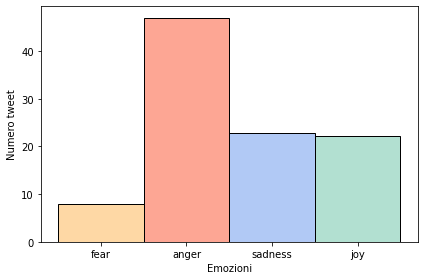

In [63]:
sns.set_palette("Set2")
colors = ['#feb24c','#fc4e2a','cornflowerblue', "#66c2a4"]
sns.histplot(x="emotions", data=filtered_df_down, hue = "emotions", legend = False, stat = 'percent', palette = colors)#
#plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
plt.xlabel('Emozioni')
#plt.savefig('img/sentiment_analysis/lou0_barplt.png')
plt.show()

In [64]:
filtered_df_picchi["emotions"].value_counts()

anger      1433
joy        1002
sadness     929
fear        279
Name: emotions, dtype: int64

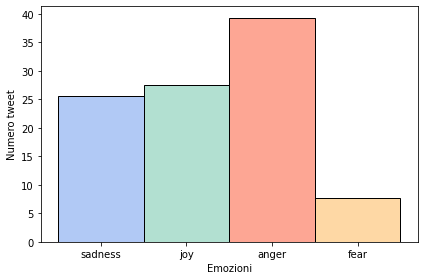

In [65]:
sns.set_palette("Set2")
colors = ['cornflowerblue',"#66c2a4",'#fc4e2a', '#feb24c']
sns.histplot(x="emotions", data=filtered_df_picchi, hue = "emotions", legend = False, stat = 'percent', palette = colors)#
#plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
plt.xlabel('Emozioni')
#plt.savefig('img/sentiment_analysis/lou0_barplt.png')
plt.show()

In [66]:
print('account verificati: \n',filtered_df_picchi['emotions'].loc[filtered_df_picchi['verified'] == True].value_counts(),'\n') #normalize = True)
print('account non verificati: \n',filtered_df_picchi['emotions'].loc[filtered_df_picchi['verified'] == False].value_counts())

account verificati: 
 sadness    11
joy        10
anger       5
fear        5
Name: emotions, dtype: int64 

account non verificati: 
 anger      1428
joy         992
sadness     918
fear        274
Name: emotions, dtype: int64


In [67]:
print('account verificati: \n',filtered_df_down['emotions'].loc[filtered_df_down['verified'] == True].value_counts(),'\n') #normalize = True)
print('account non verificati: \n',filtered_df_down['emotions'].loc[filtered_df_down['verified'] == False].value_counts())

account verificati: 
 anger      3
fear       1
sadness    1
Name: emotions, dtype: int64 

account non verificati: 
 anger      464
sadness    225
joy        221
fear        78
Name: emotions, dtype: int64


In [162]:
df.to_csv('data/df_sentiments.csv')

In [163]:
df

id        date      time              user_id  \
0      1237732721805398016  2020-03-11  14:30:51            130905290   
1      1238427084684435456  2020-03-13  12:30:00             16081414   
2      1240306917232295937  2020-03-18  16:59:47              9778122   
3      1240215608953880578  2020-03-18  10:56:57   785868835480014848   
4      1241727261251944448  2020-03-22  15:03:43           1288374560   
...                    ...         ...       ...                  ...   
17329  1498722245195227137  2022-03-01  19:10:02  1445652185442766861   
17330  1498720788299587584  2022-03-01  19:04:15           2755930961   
17331  1498718738413199362  2022-03-01  18:56:06            454365633   
17332  1498718198685970438  2022-03-01  18:53:58            454365633   
17333  1498717200278069265  2022-03-01  18:50:00           1409998686   

              username                      name place  \
0              airc_it                   airc_it   NaN   
1      wikimediaitalia          Wikimedia Italia   NaN   
2       paololattanzio            paololattanzio   NaN   
3         paroleostili            Parole O_Stili   NaN   
4        guggenheimpgc         Guggenheim Venice   NaN   
...                ...                       ...   ...   
17329  il_marchese_ant     Il Marchese Antonello   NaN   
17330         itsmxv__  queen.rachel⁷◟̽◞̽ ᴴ {jk}   NaN   
17331  scenarieconomic          Scenarieconomici   NaN   
17332  scenarieconomic          Scenarieconomici   NaN   
17333         inkd_dad              Andrew Gural   NaN   

                                                   tweet  \
0      📚 #Didatticaadistanza: sul sito di AIRC per le...   
1      #didatticaadistanza: con i progetti #Wikimedia...   
2      Ho depositato una interrogazione per attivare ...   
3      Ringraziamo di cuore @CiscoItalia che ci ha me...   
4      Crediamo nel potere dell'arte, e nella 'missio...   
...                                                  ...   
17329  @Antonio_Caramia @MilaSpicola @Miti_Vigliero @...   
17330  POV: sei Namjoon e sei finalmente riuscito a n...   
17331  @iofausto Forse non è stata la DAD ma i vaccin...   
17332  I danni della DAD  #UkrainaUnderAttack  https:...   
17333                         @NFLonCBS Bruce in Buffalo   

                                                mentions  replies_count  ...  \
0                                                     []              0  ...   
1      [{'screen_name': 'miursocial', 'name': 'miurso...              0  ...   
2                                                     []              0  ...   
3      [{'screen_name': 'ciscoitalia', 'name': 'cisco...              2  ...   
4                                                     []              2  ...   
...                                                  ...            ...  ...   
17329                                                 []              0  ...   
17330                                                 []              0  ...   
17331                                                 []              1  ...   
17332                                                 []             15  ...   
17333                                                 []              0  ...   

                                           token_wopunct  n_token  \
0      ['didatticaadistanza', 'sul', 'sito', 'di', 'a...       30   
1      ['didatticaadistanza', 'con', 'i', 'progetti',...       38   
2      ['ho', 'depositato', 'una', 'interrogazione', ...       31   
3      ['ringraziamo', 'di', 'cuore', 'ciscoitalia', ...       38   
4      ['crediamo', 'nel', 'potere', "dell'arte", ','...       45   
...                                                  ...      ...   
17329  ['antonio', 'caramia', 'milaspicola', 'miti', ...       27   
17330  ['pov', 'sei', 'namjoon', 'e', 'sei', 'finalme...       21   
17331  ['ofausto', 'forse', 'non', 'è', 'stata', 'la'...       24   
17332  ['i', 'danni', 'della', 'dad', 'ukrainaunderat...        5   
17333    